In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("ECommerce_consumer behaviour.csv")

In [3]:
data.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
5,2425083,49125,1,2,18,NaN,91,6,0,16,dairy eggs,soy lactosefree
6,2425083,49125,1,2,18,NaN,120,7,0,16,dairy eggs,yogurt
7,2425083,49125,1,2,18,NaN,59,8,0,15,canned goods,canned meals beans
8,2425083,49125,1,2,18,NaN,35,9,0,12,meat seafood,poultry counter
9,1944304,162867,1,3,17,NaN,37,1,0,1,frozen,ice cream ice


In [4]:
data.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [6]:
data.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

In [7]:
data.isna().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [8]:
data.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64

## number of products in each department

In [9]:
# Group by 'department' and count the number of unique 'product_id's in each department
product_count_per_department = data.groupby('department')['product_id'].nunique()

# Display the result
print(product_count_per_department)


department
alcohol             5
babies              4
bakery              5
beverages           8
breakfast           4
bulk                2
canned goods        5
dairy eggs         10
deli                5
dry goods pasta     5
frozen             11
household          10
international       4
meat seafood        7
missing             1
other               1
pantry             12
personal care      17
pets                2
produce             5
snacks             11
Name: product_id, dtype: int64


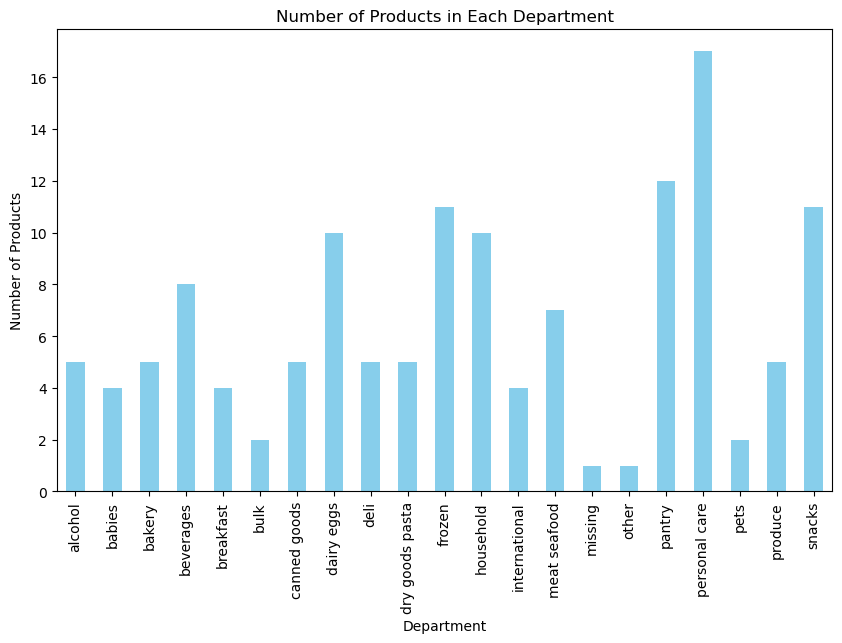

In [10]:
# Plot the product counts per department
product_count_per_department.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Set plot labels and title
plt.xlabel('Department')
plt.ylabel('Number of Products')
plt.title('Number of Products in Each Department')

# Show the plot
plt.show()


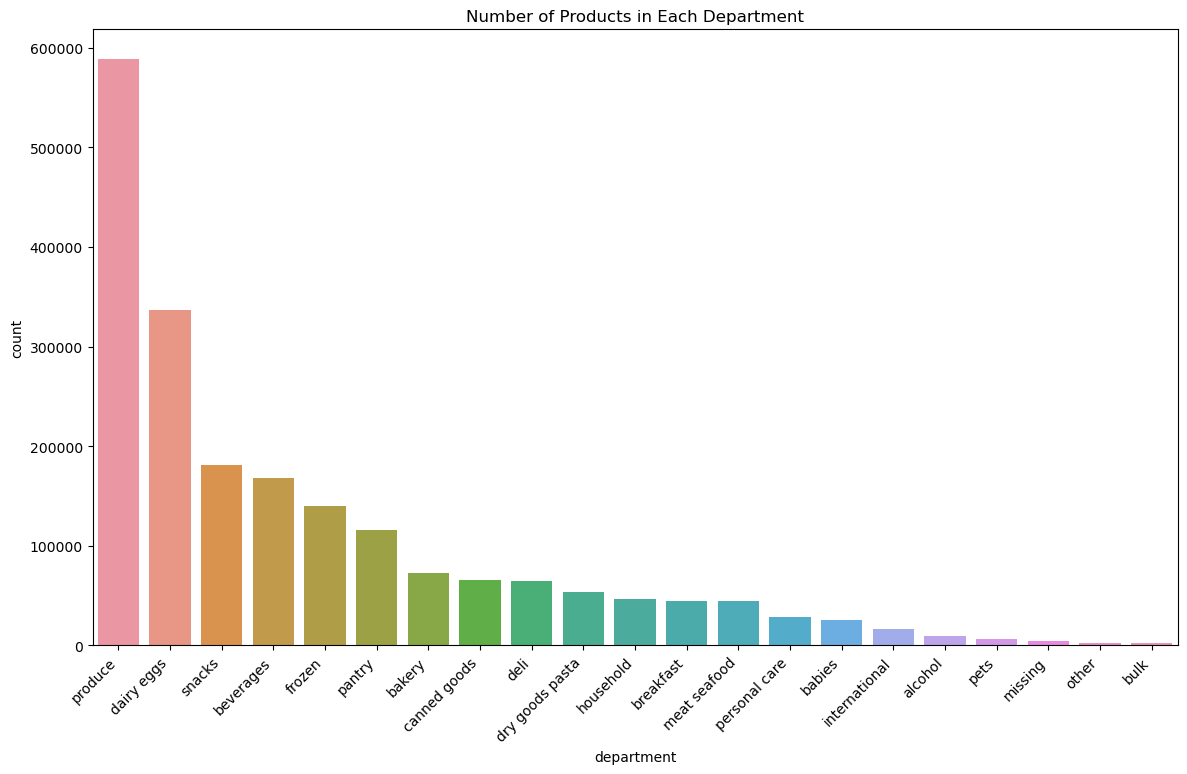

In [11]:
plt.figure(figsize=(14, 8))
sns.countplot(x='department', data=data, order=data['department'].value_counts().index)
plt.title('Number of Products in Each Department')
plt.xticks(rotation=45, ha='right')
plt.show()

## analyzing most popular products 

In [12]:
orders = data['product_name'].value_counts()
top_products = orders.head(10)
top_products

fresh fruits                     226039
fresh vegetables                 212611
packaged vegetables fruits       109596
yogurt                            90751
packaged cheese                   61502
milk                              55150
water seltzer sparkling water     52564
chips pretzels                    45306
soy lactosefree                   39389
bread                             36381
Name: product_name, dtype: int64

In [13]:
reorder = data.groupby('product_name')['reordered'].mean()
reorder

product_name
air fresheners candles           0.290143
asian foods                      0.341550
baby accessories                 0.515873
baby bath body care              0.277670
baby food formula                0.592892
                                   ...   
trash bags liners                0.345050
vitamins supplements             0.322459
water seltzer sparkling water    0.731813
white wines                      0.622821
yogurt                           0.688301
Name: reordered, Length: 134, dtype: float64

In [14]:
top_products_reorder = reorder.sort_values(ascending = False).head(10)
top_products_reorder

product_name
milk                             0.782629
water seltzer sparkling water    0.731813
fresh fruits                     0.718261
eggs                             0.707425
soy lactosefree                  0.691843
packaged produce                 0.690545
cream                            0.688618
yogurt                           0.688301
bread                            0.674528
refrigerated                     0.664586
Name: reordered, dtype: float64

In [15]:
product_popularity = pd.DataFrame({
    'Total Orders': orders,
    'Reorder Rate': reorder
})

product_popularity['Composite Score'] = product_popularity['Total Orders'] * product_popularity['Reorder Rate']

# Display the top N products based on the composite score
top_products_composite = product_popularity['Composite Score'].sort_values(ascending=False).head(10)
print(top_products_composite)

fresh fruits                     162355.0
fresh vegetables                 126171.0
packaged vegetables fruits        69872.0
yogurt                            62464.0
milk                              43162.0
water seltzer sparkling water     38467.0
packaged cheese                   35864.0
soy lactosefree                   27251.0
chips pretzels                    26615.0
bread                             24540.0
Name: Composite Score, dtype: float64


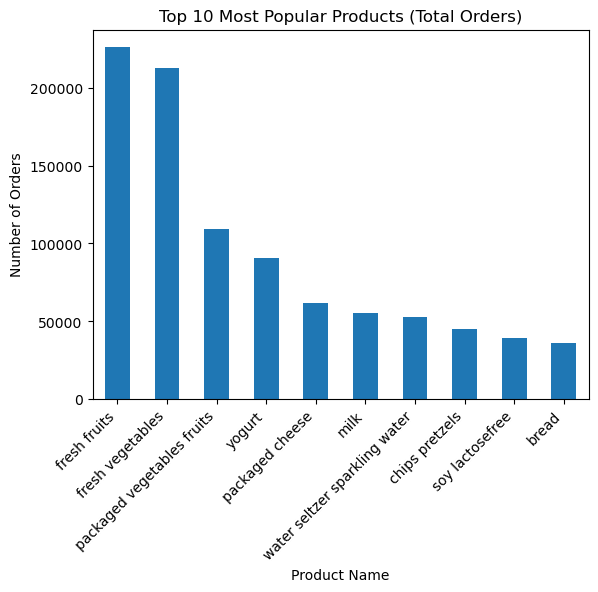

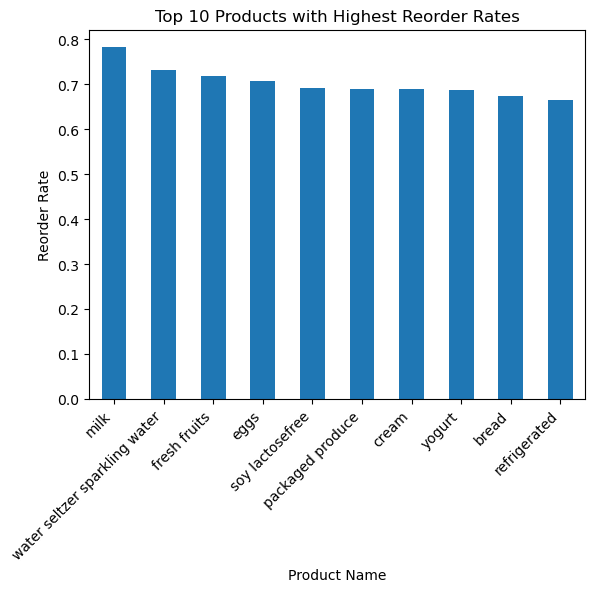

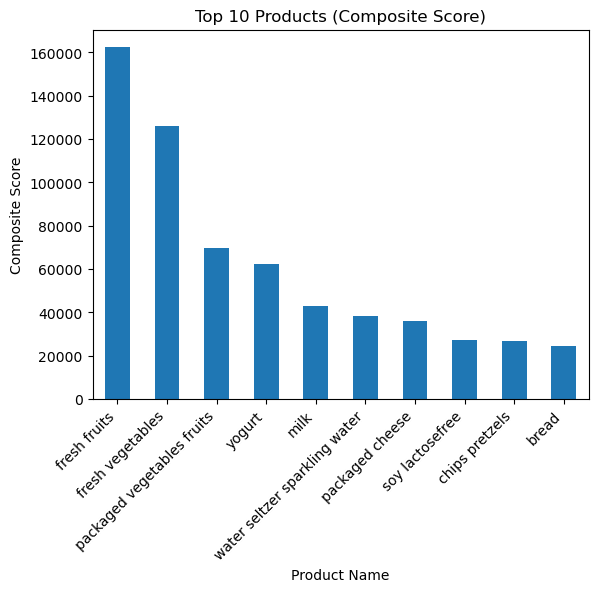

In [16]:
# Bar chart for the top N products based on total orders
top_products.plot(kind='bar', title='Top 10 Most Popular Products (Total Orders)')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bar chart for the top N products based on reorder rate
top_products_reorder.plot(kind='bar', title='Top 10 Products with Highest Reorder Rates')
plt.xlabel('Product Name')
plt.ylabel('Reorder Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bar chart for the top N products based on composite score
top_products_composite.plot(kind='bar', title='Top 10 Products (Composite Score)')
plt.xlabel('Product Name')
plt.ylabel('Composite Score')
plt.xticks(rotation=45, ha='right')
plt.show()

### Identifying users with the most frequent orders

In [17]:
Reorders = data['reordered'].value_counts()
Reorders

1    1190986
0     828515
Name: reordered, dtype: int64

In [18]:
user_order_frequency = data['user_id'].value_counts()
user_order_frequency

176478    460
129928    405
126305    384
201268    347
115495    283
         ... 
124195      1
192874      1
73682       1
118192      1
170728      1
Name: user_id, Length: 105273, dtype: int64

In [19]:
most_frequent_users = user_order_frequency.head(20)
most_frequent_users

176478    460
129928    405
126305    384
201268    347
115495    283
100330    271
31903     270
15503     258
105213    245
203166    240
193539    238
17738     236
60694     232
97816     227
175294    223
96305     213
11375     213
180203    212
33731     212
167069    210
Name: user_id, dtype: int64

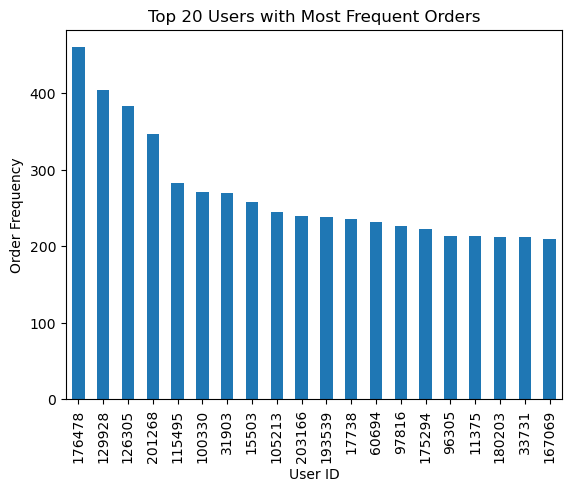

In [20]:
most_frequent_users.plot(kind='bar', title='Top 20 Users with Most Frequent Orders')
plt.xlabel('User ID')
plt.ylabel('Order Frequency')
plt.show()


In [21]:
most_frequent_users_orders = data[data['user_id'].isin(most_frequent_users.index)]
most_frequent_users_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
3720,2444711,100330,32,5,15,9.0,94,1,1,7,beverages,tea
3721,2444711,100330,32,5,15,9.0,120,2,1,16,dairy eggs,yogurt
3722,2444711,100330,32,5,15,9.0,26,3,1,7,beverages,coffee
3723,2444711,100330,32,5,15,9.0,94,4,1,7,beverages,tea
3724,2444711,100330,32,5,15,9.0,31,5,1,7,beverages,refrigerated
...,...,...,...,...,...,...,...,...,...,...,...,...
2012510,388468,180203,13,2,10,28.0,42,40,0,1,frozen,frozen vegan vegetarian
2012511,388468,180203,13,2,10,28.0,121,41,0,14,breakfast,cereal
2012512,388468,180203,13,2,10,28.0,37,42,0,1,frozen,ice cream ice
2012513,388468,180203,13,2,10,28.0,116,43,0,1,frozen,frozen produce


In [22]:
product_order_frequency = most_frequent_users_orders['product_name'].value_counts()
product_order_frequency

fresh fruits                  507
yogurt                        505
fresh vegetables              316
energy granola bars           246
packaged vegetables fruits    228
                             ... 
muscles joints pain relief      1
cocoa drink mixes               1
canned meat seafood             1
frozen juice                    1
feminine care                   1
Name: product_name, Length: 112, dtype: int64

In [23]:
most_ordered_products = product_order_frequency.head(20)
most_ordered_products

fresh fruits                     507
yogurt                           505
fresh vegetables                 316
energy granola bars              246
packaged vegetables fruits       228
water seltzer sparkling water    195
packaged cheese                  177
chips pretzels                   162
soy lactosefree                  151
tea                              146
refrigerated                     143
bread                            121
baby food formula                120
milk                             112
lunch meat                       111
nuts seeds dried fruit           106
breakfast bakery                  98
candy chocolate                   90
granola                           85
fresh dips tapenades              80
Name: product_name, dtype: int64

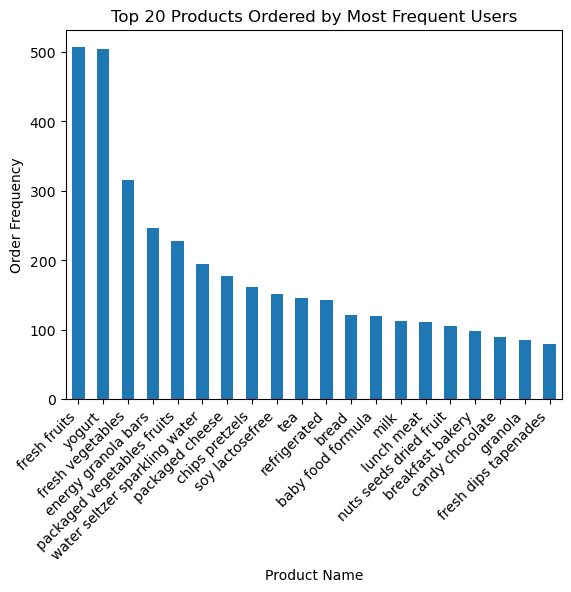

In [24]:

most_ordered_products.plot(kind='bar', title='Top 20 Products Ordered by Most Frequent Users')
plt.xlabel('Product Name')
plt.ylabel('Order Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


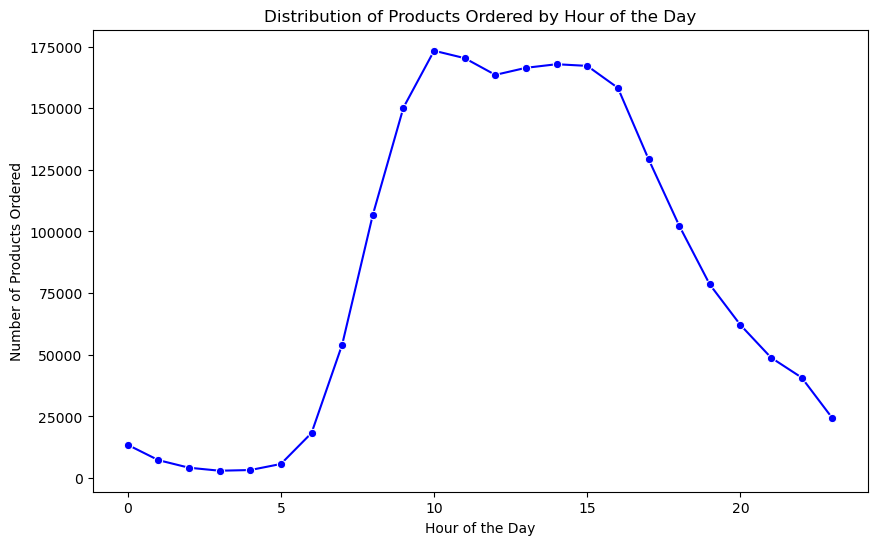

In [25]:
products_by_hour = data.groupby('order_hour_of_day')['product_id'].count().reset_index(name='order_count')

plt.figure(figsize=(10, 6))
sns.lineplot(x='order_hour_of_day', y='order_count', data=products_by_hour, marker='o', linestyle='-', color='b')

plt.title('Distribution of Products Ordered by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')

plt.show()


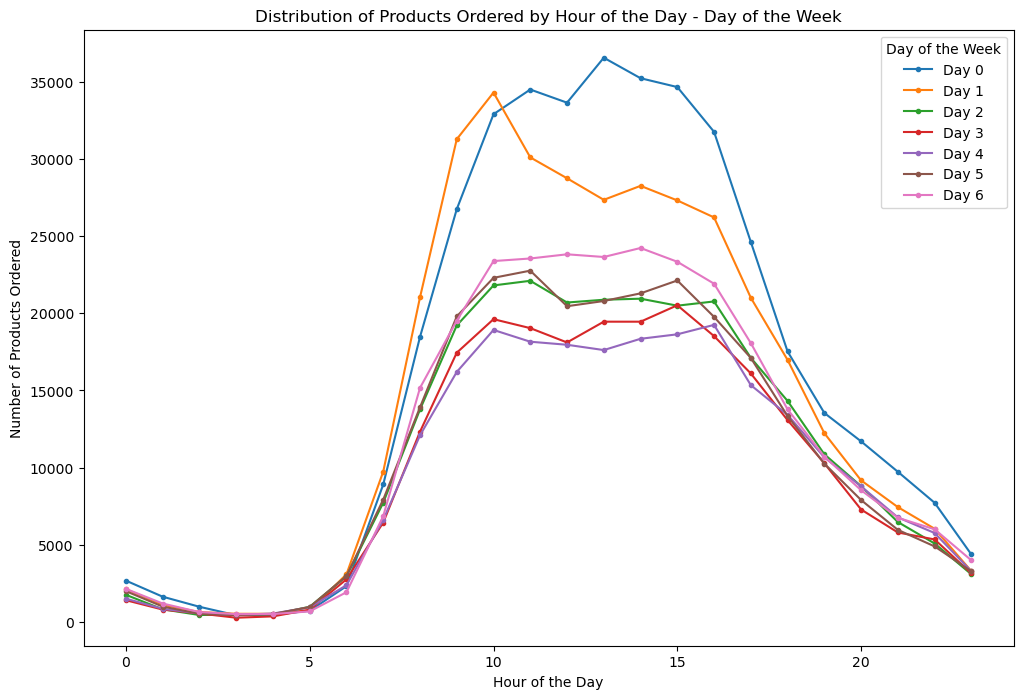

In [26]:

# Group the data by 'order_hour_of_day' and 'order_dow' and count the number of orders for each hour and day of the week
products_by_hour_dow = data.groupby(['order_dow', 'order_hour_of_day']).size().unstack()

# Create a line plot
plt.figure(figsize=(12, 8))

# Plot each day of the week
for day in range(7):  # Assuming 0 is Sunday, 1 is Monday, ..., 6 is Saturday
    plt.plot(products_by_hour_dow.loc[day], label=f'Day {day}', marker = 'o', markersize = 3)

# Set plot labels and title
plt.title('Distribution of Products Ordered by Hour of the Day - Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')
plt.legend(title='Day of the Week', loc='upper right')

# Show the plot
plt.show()


### identifying combinations of products that are often purchased together

In [27]:
# pip install mlxtend

In [28]:
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming your DataFrame is named 'df'

# Create a DataFrame with relevant columns
basket = data.groupby(['order_id', 'product_name'])['product_id'].count().unstack().reset_index().fillna(0).set_index('order_id')

# Convert count values to binary (1 if the product was purchased, 0 otherwise)
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


C:\Users\ibmjo\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [29]:
sorted_rules = rules.sort_values(by = 'lift', ascending = False)
pd.set_option('display.max_rows', None)
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
186,"(fresh fruits, fresh vegetables)",(fresh herbs),0.317560,0.093005,0.061815,0.194656,2.092964,0.032280,1.126221,0.765208
191,(fresh herbs),"(fresh fruits, fresh vegetables)",0.093005,0.317560,0.061815,0.664642,2.092964,0.032280,2.034958,0.575757
189,(fresh vegetables),"(fresh fruits, fresh herbs)",0.444360,0.070135,0.061815,0.139110,1.983463,0.030650,1.080121,0.892361
188,"(fresh fruits, fresh herbs)",(fresh vegetables),0.070135,0.444360,0.061815,0.881372,1.983463,0.030650,4.683872,0.533229
376,"(fresh vegetables, yogurt)","(packaged vegetables fruits, fresh fruits)",0.144660,0.269870,0.076240,0.527029,1.952899,0.037201,1.543710,0.570464
377,"(packaged vegetables fruits, fresh fruits)","(fresh vegetables, yogurt)",0.269870,0.144660,0.076240,0.282506,1.952899,0.037201,1.192122,0.668293
86,(fresh vegetables),(fresh herbs),0.444360,0.093005,0.078655,0.177007,1.903203,0.037327,1.102069,0.854096
87,(fresh herbs),(fresh vegetables),0.093005,0.444360,0.078655,0.845707,1.903203,0.037327,3.601205,0.523233
365,"(fresh fruits, fresh vegetables)","(packaged cheese, packaged vegetables fruits)",0.317560,0.114610,0.068325,0.215156,1.877290,0.031929,1.128110,0.684774
360,"(packaged cheese, packaged vegetables fruits)","(fresh fruits, fresh vegetables)",0.114610,0.317560,0.068325,0.596152,1.877290,0.031929,1.689844,0.527809


In [30]:
sorted_rules.shape

(384, 10)

In [31]:
# sorted_rules.to_csv('basket.csv')

In [32]:
# pip install scikit-surprise